In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
import scipy.misc as misc
import scipy.signal as signal

def dft(x):
    N = x.shape[0]                      # dimension of configuration space
    n = np.arange(N)                    # row vector {0,1,2, ...N-1}
    k = n.reshape((N, 1))               # column vector {0,1,2, ...N-1}
    M = np.exp(-2j * np.pi * k * n / N) # k * n builds NxN matrix
    return np.dot(M, x)                 # matric-vector multiplication X = M.x

Text(0, 0.5, 'imag(Y_k)')

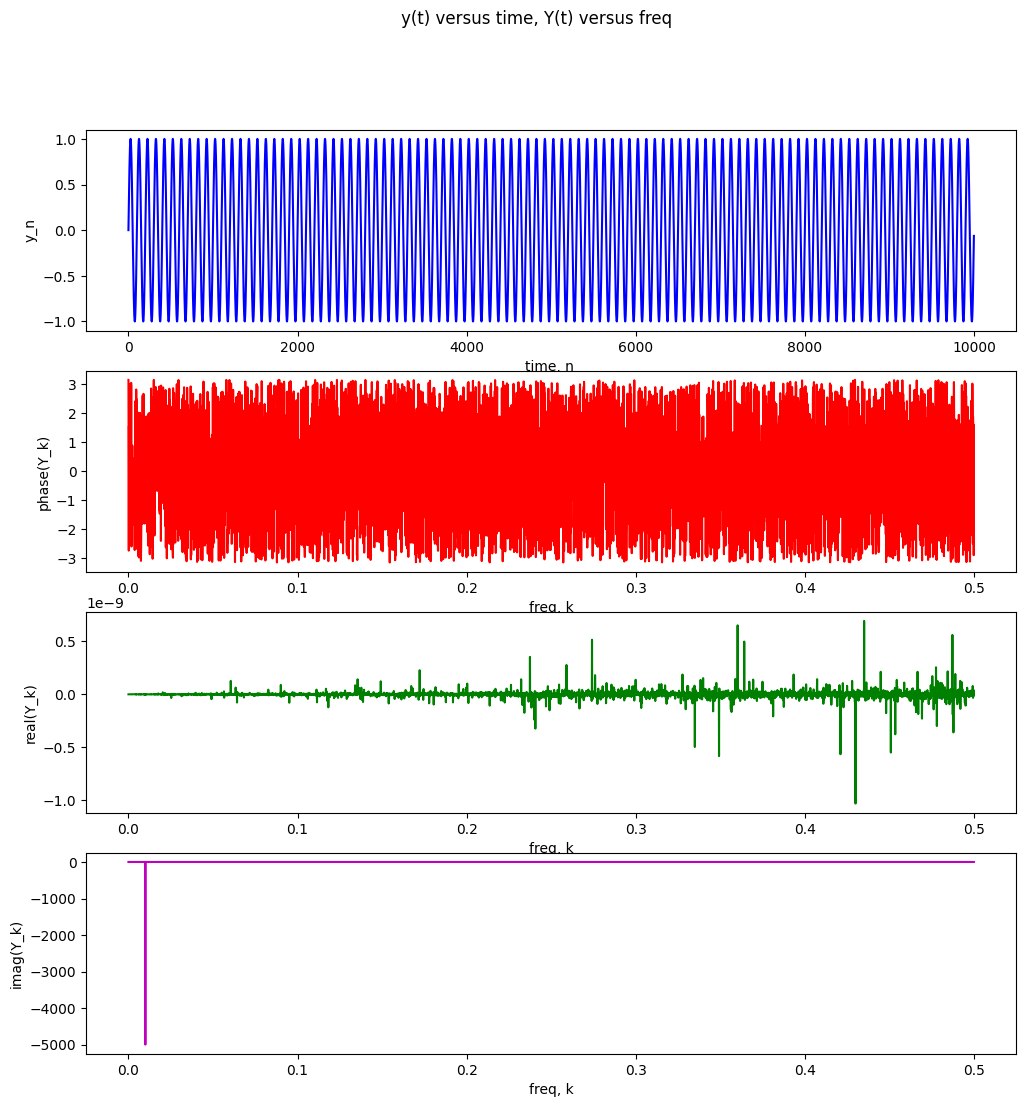

In [16]:
Np = 10000
T_o = 100
f_o = 1/T_o

t = np.linspace(0,Np-1,num=Np)
y = np.sin(2*np.pi*f_o*t)
#y = signal.square(2*np.pi*f_o*t)
#y = signal.sawtooth(2*np.pi*f_o*t)
#y = signal.unit_impulse( Np, 500)


Y = dft(y)[:Np//2]       # get fft & remove mirror 0 ... Np/2-1, Np/2 ... Np-1
f = fftfreq(Np,1)[:Np//2] # arguments are sample number, sample dt, & remove mirror

fig, axes = plt.subplots(4,figsize=(12, 12))
fig.suptitle('y(t) versus time, Y(t) versus freq')

axes[0].plot(t, y, "b")
axes[0].set_xlabel ('time, n ')
axes[0].set_ylabel ('y_n')

axes[1].plot(f, np.angle(Y), "r")
axes[1].set_xlabel ('freq, k')
axes[1].set_ylabel ('phase(Y_k)')

axes[2].plot(f, np.real(Y), "g")
axes[2].set_xlabel ('freq, k')
axes[2].set_ylabel ('real(Y_k)')

axes[3].plot(f, np.imag(Y), "m")
axes[3].set_xlabel ('freq, k')
axes[3].set_ylabel ('imag(Y_k)')

#axes[4].plot(f, np.abs(Y), "r")
#axes[4].set_xlabel ('freq, k')
#axes[4].set_ylabel ('abs(Y_k)')

In [ ]:
%timeit fft(y)

136 µs ± 30.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
%timeit dft(y)

6.77 s ± 1.56 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


<ipython-input-6-f3480280b49d>:1: DeprecationWarning: scipy.misc.electrocardiogram has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.electrocardiogram instead.
  y = misc.electrocardiogram()


(0.0, 1.0)

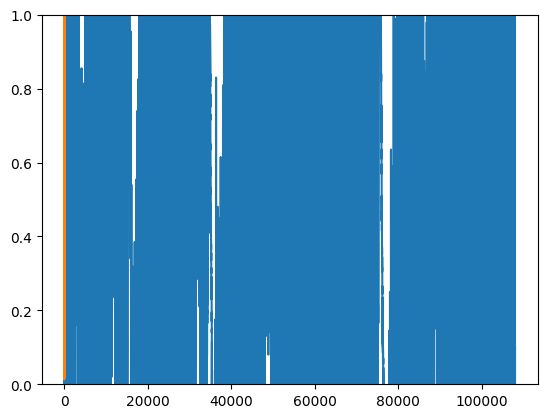

In [ ]:
y = misc.electrocardiogram()
plt.plot(y)
Np = len(y)

f = fft(y)[0:Np//2]       # get fft & remove mirror 0 ... Np/2-1, Np/2 ... Np-1
yf = fftfreq(Np,1)[:Np//2] # arguments are sample number, sample dt, &  remove mirror%
plt.plot(yf,abs(f))
plt.ylim(0,1)

In [ ]:
#y = np.cos(2*np.pi*f_o*t)
#y = signal.sawtooth(2*np.pi*f_o*t)
#y = signal.square(2*np.pi*f_o*t)
#y = signal.unit_impulse( Np, 250)